In [1]:
import numpy as np 
import pandas as pd 
import sklearn 

In [2]:
df = pd.read_csv('train.csv')
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
X = df.iloc[:, 1:] # we need all columns (1-784)
y = df.iloc[:, 0] # we need only the labels which is in col 0

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
print(X_train.shape)
print(y_test.shape)

(33600, 784)
(8400,)


In [5]:
# first step is to standerize the data 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components=100)


X_train_trf = pca.fit_transform(X_train) #fit->learn the relation tranform-> apply those learning 
X_test_trf = pca.transform(X_test)


In [7]:
X_train_trf.shape

(33600, 100)

In [8]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()


In [9]:
knn.fit(X_train_trf, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [10]:
y_pred = knn.predict(X_test_trf)

In [11]:
from sklearn.metrics import accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9544047619047619


In [12]:
# so now for n_component=100 we are getting 95% acc so now using a  for loop to see all the posible n_component in which we get the best accu

for i in range(10, 201, 10):   
    pca = PCA(n_components=i)
    X_train_trf = pca.fit_transform(X_train)
    X_test_trf = pca.transform(X_test)
    
    knn = KNeighborsClassifier()
    
    knn.fit(X_train_trf, y_train)
    y_pred = knn.predict(X_test_trf)
    acc = knn.score(X_test_trf, y_test)
    
    print(f"Components: {i}, Accuracy: {acc}")

Components: 10, Accuracy: 0.9055952380952381
Components: 20, Accuracy: 0.9442857142857143
Components: 30, Accuracy: 0.9491666666666667
Components: 40, Accuracy: 0.9528571428571428
Components: 50, Accuracy: 0.9533333333333334
Components: 60, Accuracy: 0.9545238095238096
Components: 70, Accuracy: 0.9539285714285715
Components: 80, Accuracy: 0.9552380952380952
Components: 90, Accuracy: 0.955
Components: 100, Accuracy: 0.9544047619047619
Components: 110, Accuracy: 0.9530952380952381
Components: 120, Accuracy: 0.9536904761904762
Components: 130, Accuracy: 0.9528571428571428
Components: 140, Accuracy: 0.9533333333333334
Components: 150, Accuracy: 0.9520238095238095
Components: 160, Accuracy: 0.9519047619047619
Components: 170, Accuracy: 0.9511904761904761
Components: 180, Accuracy: 0.9510714285714286
Components: 190, Accuracy: 0.9511904761904761
Components: 200, Accuracy: 0.9507142857142857


In [13]:
# visualization using plotly

pca = PCA(n_components=3)
X_trian_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [14]:
X_train_trf

array([[-2.71863253e+00, -4.89824095e-01,  1.13549660e+00, ...,
        -1.16640984e+00,  1.02491587e+00, -4.30424323e-01],
       [-6.76980150e-01, -6.75362491e+00, -2.33590139e+00, ...,
        -2.48961818e-01,  1.54975321e-01, -3.58991082e-01],
       [-3.03323281e+00,  6.50981624e+00,  7.49182983e+00, ...,
         8.23754883e-01, -2.08688822e-01,  4.71100775e-01],
       ...,
       [ 2.14883643e+00,  7.80794439e-01, -7.47387739e-01, ...,
         8.75132755e-01,  7.55620744e-03,  1.09446942e-01],
       [ 1.05957006e+00,  9.47673116e-01,  3.94973114e+00, ...,
         1.01107308e+00,  6.07921171e-01, -1.23912882e-01],
       [ 1.77025845e+01,  1.96188185e+00, -4.94352837e+00, ...,
         4.66672011e-01, -4.92150430e-01,  6.84232388e-01]],
      shape=(33600, 200))

In [15]:
import plotly.express as px
import plotly.io as pio

# Set renderer
pio.renderers.default = "notebook_connected"   # or "browser" if notebook fails

# Convert labels to string for coloring
y_train_trf = y_train.astype(str)

# Create 3D scatter plot
fig = px.scatter_3d(
    x=X_train_trf[:, 0],
    y=X_train_trf[:, 1],
    z=X_train_trf[:, 2],
    color=y_train_trf
)

# Adjust margins
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20)
)

# Show plot
fig.show()


In [16]:
import plotly.express as px
import plotly.io as pio
from sklearn.decomposition import PCA

# Set renderer (adjust if you're in VS Code or running .py file)
pio.renderers.default = "notebook_connected"   # or "browser"

# Apply PCA with 2 components
pca = PCA(n_components=2)
X_train_trf = pca.fit_transform(X_train)
X_test_trf  = pca.transform(X_test)

# Convert labels to string for coloring
y_train_trf = y_train.astype(str)

# Create 2D scatter plot
fig = px.scatter(
    x=X_train_trf[:, 0],
    y=X_train_trf[:, 1],
    color=y_train_trf,
    title="Digits in 2D PCA space"
)

# Adjust margins
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    xaxis_title="PCA Component 1",
    yaxis_title="PCA Component 2"
)

# Show plot
fig.show()


In [18]:
# now after the opertion we get 

pca.explained_variance_ #egien values 
 # these values are the d and d^2 so the d > d^2 so algo chosse the col of d 

array([40.67111198, 29.17023401])

In [19]:
pca.components_ #eigen vectors

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [-0., -0., -0., ..., -0., -0., -0.]], shape=(2, 784))

In [20]:
# finding the exact no. of compoonent (principal compo.)

pca = PCA(n_components=None)
X_train_trf = pca.fit_transform(X_train)
X_test_trf  = pca.transform(X_test)

In [22]:
pca.explained_variance_.shape

(784,)

In [24]:
pca.components_.shape

(784, 784)

In [25]:
pca.explained_variance_ratio_

array([5.78519225e-02, 4.14926968e-02, 3.80423901e-02, 2.96626277e-02,
       2.58156168e-02, 2.25498018e-02, 1.97306802e-02, 1.77527998e-02,
       1.56865066e-02, 1.43606328e-02, 1.37025484e-02, 1.22725500e-02,
       1.14691200e-02, 1.12302739e-02, 1.05852885e-02, 1.01993106e-02,
       9.57676152e-03, 9.42708817e-03, 9.12489429e-03, 8.90170190e-03,
       8.39940495e-03, 8.20063196e-03, 7.85303229e-03, 7.56739707e-03,
       7.37261022e-03, 7.01884653e-03, 6.97919728e-03, 6.71104483e-03,
       6.39845030e-03, 6.30337291e-03, 6.15350848e-03, 6.02388659e-03,
       5.83673972e-03, 5.78547759e-03, 5.72333148e-03, 5.46399774e-03,
       5.43207369e-03, 5.28172755e-03, 5.13381744e-03, 4.94015474e-03,
       4.87671103e-03, 4.81978768e-03, 4.68204430e-03, 4.59342487e-03,
       4.57660834e-03, 4.49219022e-03, 4.44682221e-03, 4.41540749e-03,
       4.35111936e-03, 4.32032928e-03, 4.21808870e-03, 4.18243127e-03,
       4.07994349e-03, 4.02004913e-03, 3.98335855e-03, 3.94598812e-03,
      

In [26]:
#using the cummulative sum to add the prevcious two number to see when did we reach 90% varience explained 

np.cumsum(pca.explained_variance_ratio_)

array([0.05785192, 0.09934462, 0.13738701, 0.16704964, 0.19286525,
       0.21541506, 0.23514574, 0.25289854, 0.26858504, 0.28294568,
       0.29664822, 0.30892077, 0.32038989, 0.33162017, 0.34220546,
       0.35240477, 0.36198153, 0.37140862, 0.38053351, 0.38943521,
       0.39783462, 0.40603525, 0.41388828, 0.42145568, 0.42882829,
       0.43584714, 0.44282633, 0.44953738, 0.45593583, 0.4622392 ,
       0.46839271, 0.4744166 , 0.48025334, 0.48603881, 0.49176214,
       0.49722614, 0.50265822, 0.50793994, 0.51307376, 0.51801392,
       0.52289063, 0.52771041, 0.53239246, 0.53698588, 0.54156249,
       0.54605468, 0.5505015 , 0.55491691, 0.55926803, 0.56358836,
       0.56780645, 0.57198888, 0.57606882, 0.58008887, 0.58407223,
       0.58801822, 0.59188694, 0.59571889, 0.59948441, 0.60322635,
       0.60687487, 0.6104829 , 0.61402176, 0.61750117, 0.62094441,
       0.62432378, 0.62767368, 0.63099377, 0.63426257, 0.63746765,
       0.64065542, 0.64376931, 0.64686564, 0.64992395, 0.65296

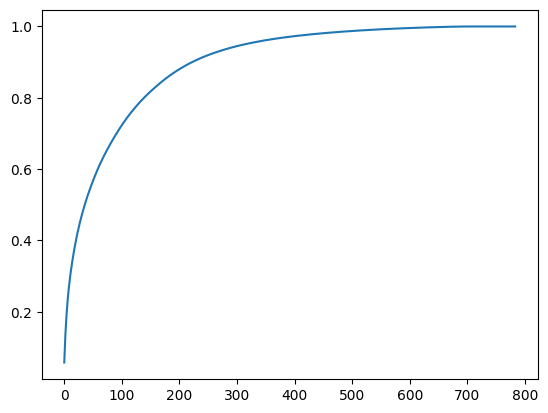

In [27]:
import matplotlib.pyplot as plt 
plt.plot(np.cumsum(pca.explained_variance_ratio_))